## Course Assignment  1 - Firas Obeid
<div class="alert alert-info"><h3>Financial Applications with Machine Learning Course:</h3>
    Data visualization and exploration of a micsellaneous data set from Kaggle.com
<strong>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

data = pd.read_csv('data.csv',index_col='rating_action_date',parse_dates=True)
data.head(10)

,rating_agency_name,file_creating_date,issued_paid,rating,rating_action_class,obligor_sec_category,obligor_name
rating_action_date,,,,,,,
2017-11-30,"Morningstar Credit Ratings, LLC.",1/17/2019,False,WO,WO,Corporate,Baker Hughes Inc
2012-09-18,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB+,DG,Corporate,Baker Hughes Inc
2010-04-05,"Morningstar Credit Ratings, LLC.",1/17/2019,False,A-,HS,Corporate,Baker Hughes Inc
2015-06-24,"Morningstar Credit Ratings, LLC.",1/17/2019,False,WO,WO,Corporate,Ball Corp
2010-09-01,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BB+,HS,Corporate,Ball Corp
2018-11-28,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB,UP,Corporate,Barrick Gold Corp
2013-09-17,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB-,DG,Corporate,Barrick Gold Corp
2012-06-29,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB,DG,Corporate,Barrick Gold Corp
2010-09-10,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB+,HS,Corporate,Barrick Gold Corp


In [76]:
data.describe()

,rating_agency_name,file_creating_date,issued_paid,rating,rating_action_class,obligor_sec_category,obligor_name
count,2215,2215,2215,2215,2215,2215,2215
unique,1,1,1,23,7,1,847
top,"Morningstar Credit Ratings, LLC.",1/17/2019,False,WO,HS,Corporate,USG Corp
freq,2215,2215,2215,679,847,2215,7


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2215 entries, 2017-11-30 to 2014-08-04
Data columns (total 7 columns):
rating_agency_name      2215 non-null object
file_creating_date      2215 non-null object
issued_paid             2215 non-null bool
rating                  2215 non-null object
rating_action_class     2215 non-null object
obligor_sec_category    2215 non-null object
obligor_name            2215 non-null object
dtypes: bool(1), object(6)
memory usage: 123.3+ KB


In [78]:
data.tail()

,rating_agency_name,file_creating_date,issued_paid,rating,rating_action_class,obligor_sec_category,obligor_name
rating_action_date,,,,,,,
2016-08-19,"Morningstar Credit Ratings, LLC.",1/17/2019,False,WO,WO,Corporate,KKR & Co Inc
2014-10-07,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB+,HS,Corporate,KKR & Co Inc
2016-08-19,"Morningstar Credit Ratings, LLC.",1/17/2019,False,WO,WO,Corporate,The Carlyle Group LP
2014-10-07,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB+,HS,Corporate,The Carlyle Group LP
2014-08-04,"Morningstar Credit Ratings, LLC.",1/17/2019,False,BBB,HS,Corporate,Synchrony Financial


 **NOTES:** 
 * Columns with a unique character of 1 are removed since are not necessary
 * No null values to deal with
 * Without understanding what the two rating columns are (field knowledge) the data exploration cant be approached correctly

In [79]:
data_new = data[['rating', 'rating_action_class', 'obligor_name']]
data_new.head()

,rating,rating_action_class,obligor_name
rating_action_date,,,
2017-11-30,WO,WO,Baker Hughes Inc
2012-09-18,BBB+,DG,Baker Hughes Inc
2010-04-05,A-,HS,Baker Hughes Inc
2015-06-24,WO,WO,Ball Corp
2010-09-01,BB+,HS,Ball Corp


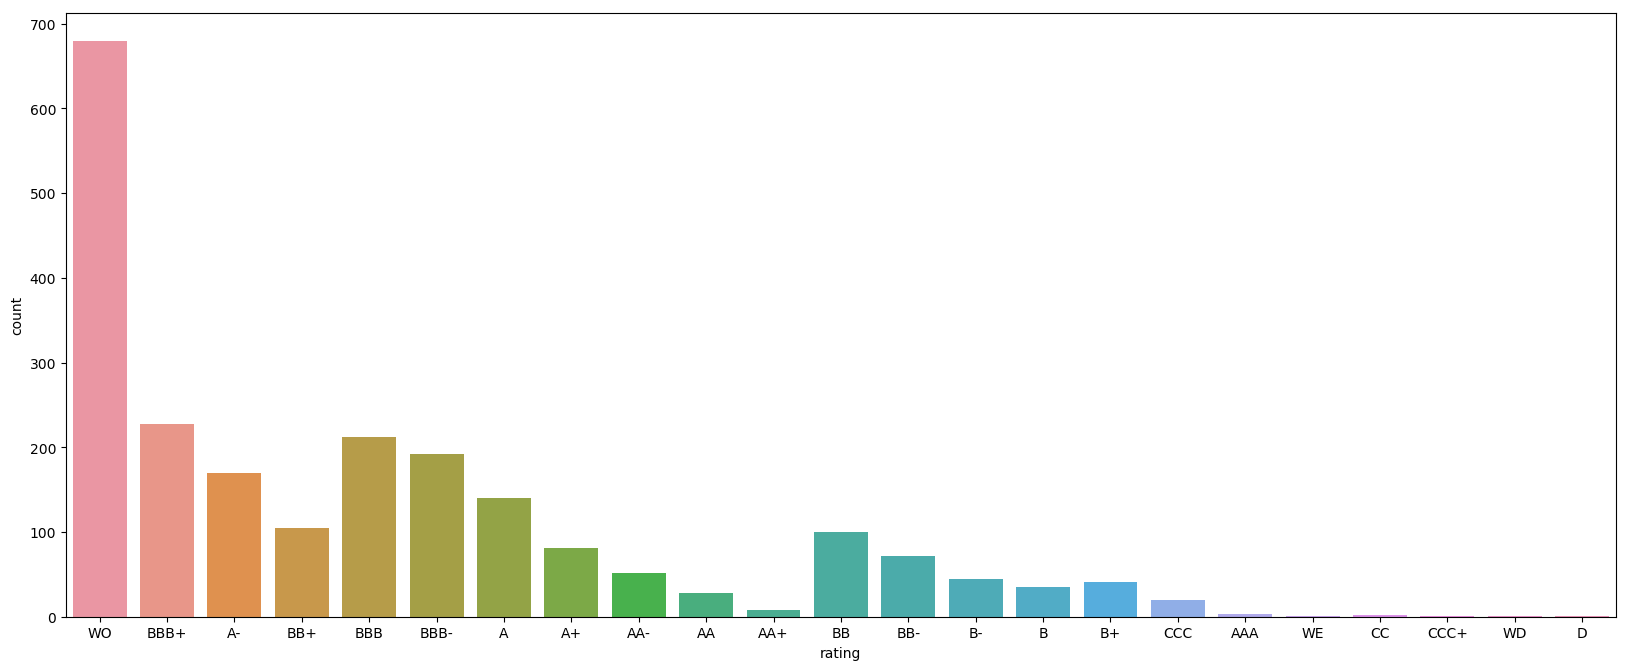

In [80]:
figure(num=None, figsize=(20, 8), dpi=100, facecolor='w', edgecolor='k')
sns.countplot(x='rating',data=data);

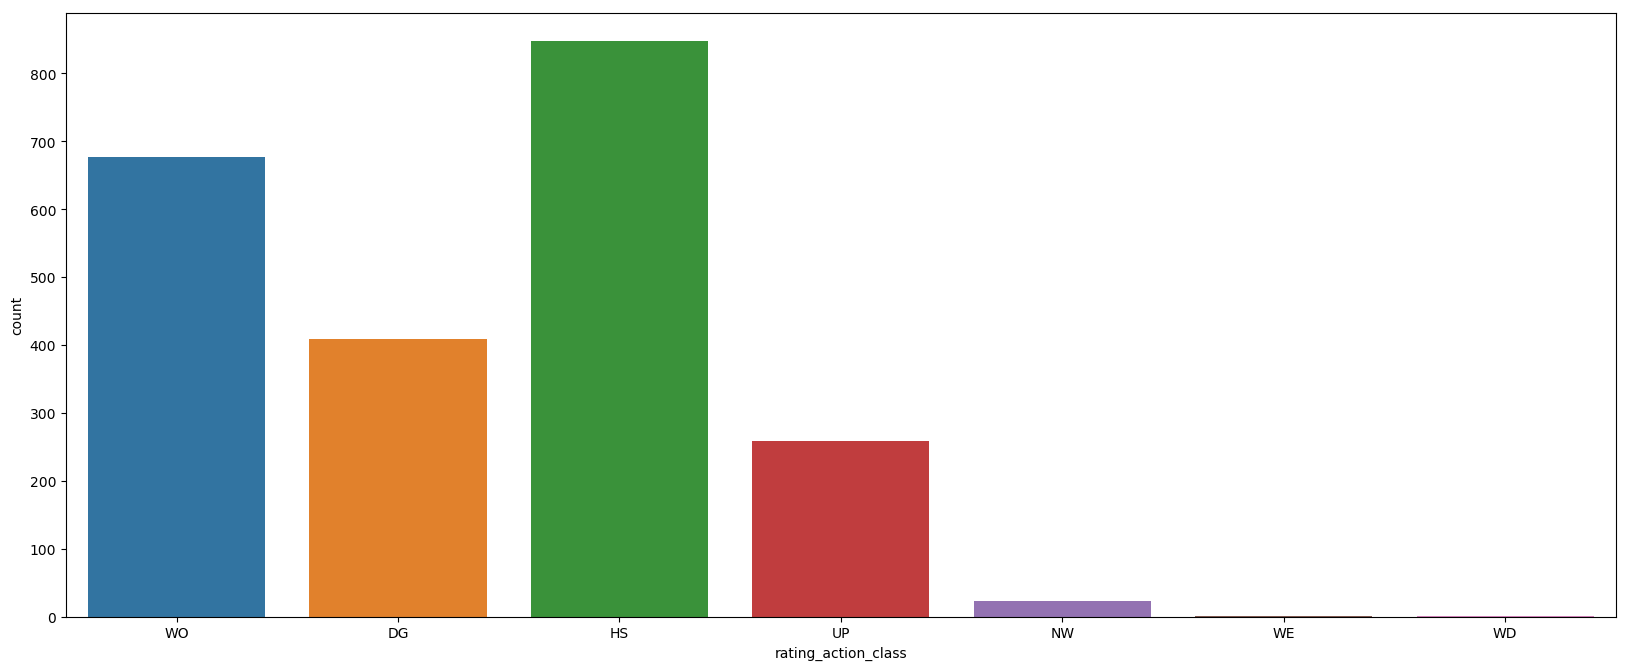

In [81]:
figure(num=None, figsize=(20, 8), dpi=100, facecolor='w', edgecolor='k')
sns.countplot(x='rating_action_class',data=data);

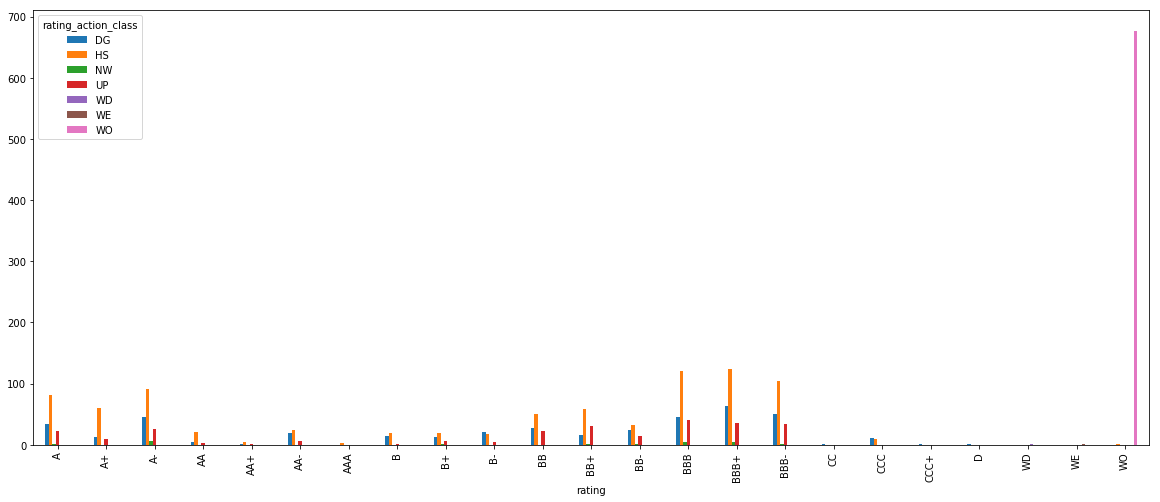

In [82]:
figure(num=None, figsize=(20, 8), dpi=100, facecolor='w', edgecolor='k');
df=data.groupby(['rating','rating_action_class']).size();
df=df.unstack();
df.plot(kind='bar', figsize = (20,8));

In [83]:
data_no_wo = data[data['rating'] != 'WO']  
# WO is skewing the data thus tried to remove it to understand how other data are spread since every WO rating 
# has a wo rating class but not the opposite

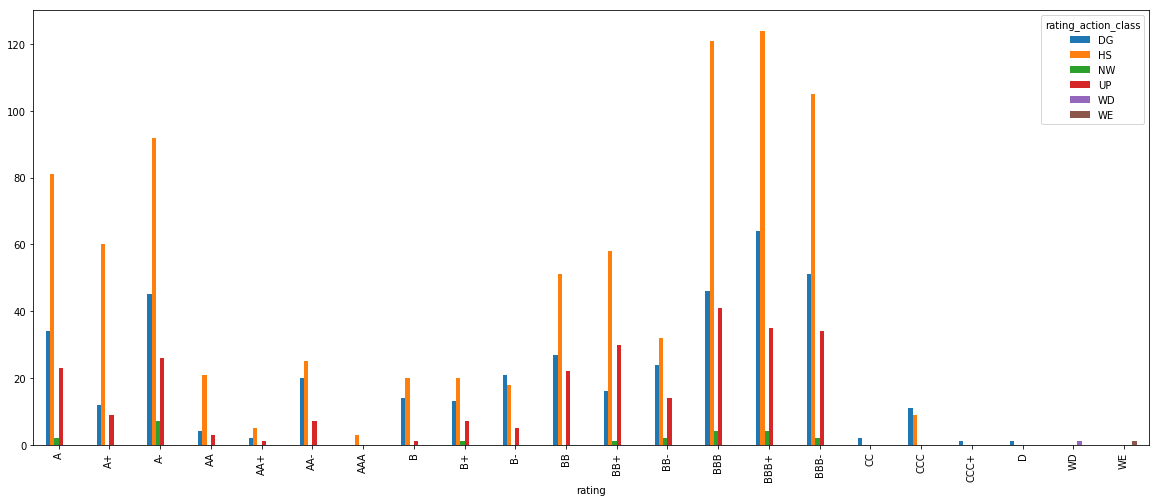

In [84]:
df2=data_no_wo.groupby(['rating','rating_action_class']).size()
df2=df2.unstack()
df2.plot(kind='bar', figsize = (20,8));